In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
enc = LabelEncoder()
df['Gender'] = enc.fit_transform(df['Gender'])

In [9]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: >

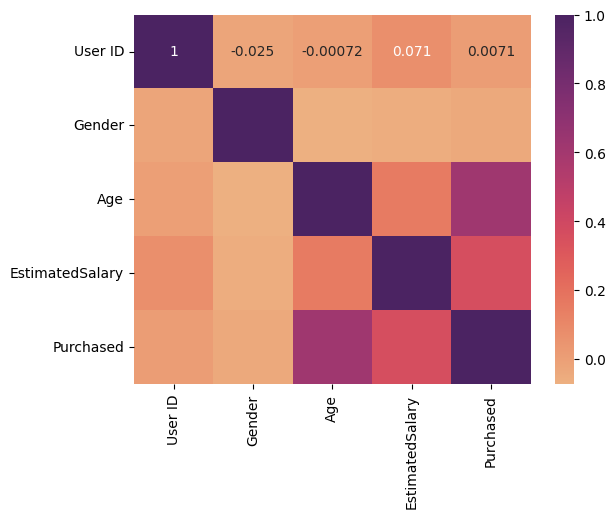

In [10]:
sns.heatmap(df.corr() , annot= True, cmap ='flare')

In [11]:
df.drop('User ID', inplace = True, axis= 1)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
X=df.drop('Purchased', axis=1)
Y= df['Purchased']

In [13]:
print (Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
Y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [20]:
accuracy_score(Y_test, Y_pred)

0.65

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [22]:
std = StandardScaler()
model2 = make_pipeline (std, LogisticRegression())

In [23]:
model2.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
y_pred = model2.predict(X_test)

In [25]:
accuracy_score(Y_test, y_pred)

0.8875

In [26]:
confusion_matrix(Y_test, y_pred)

array([[50,  2],
       [ 7, 21]])

Text(0.5, 23.52222222222222, 'Predicted')

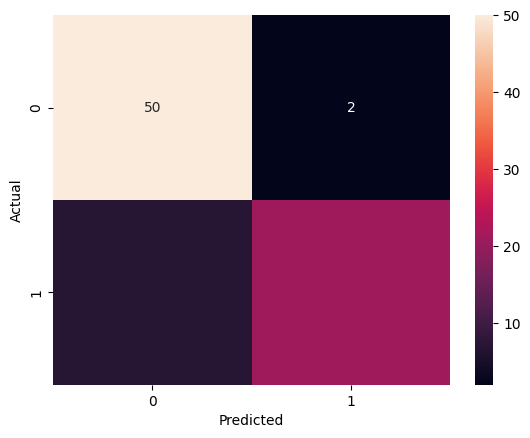

In [27]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [28]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

Text(0.5, 1.0, 'Train Precision-Recall Curve')

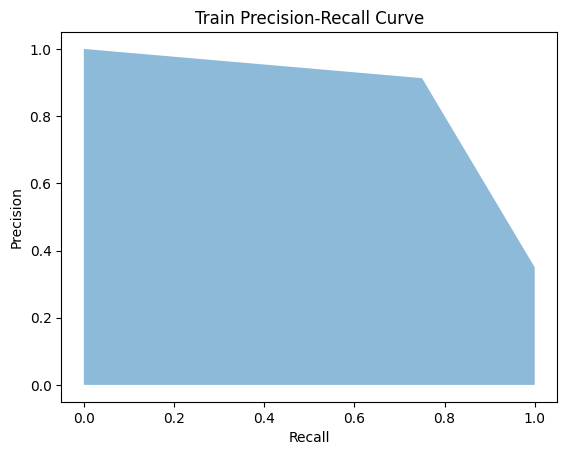

In [29]:
precision, recall, threshold = precision_recall_curve(Y_test, y_pred)
plt.fill_between(recall,precision,alpha = 0.5)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Train Precision-Recall Curve')